1.	Import necessary libraries such as OpenCV, Matplotlib, Pandas, NumPy, and Keras.

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np


2.Mount the Google Drive to access the dataset stored in it.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reads a CSV file named handwritten_text.csv located in the handwritten_word_prediction directory of the  Google Drive. 

In [3]:
df = pd.read_csv('/content/drive/My Drive/handwritten_word_prediction/handwritten_text.csv')

 display the first 5 rows of the DataFrame df using the head() function from the pandas library.

By default, when no argument is passed to the head() function, it returns the first 5 rows of the DataFrame. 

In [4]:
df.head()

,Image,Label
0,1.jpg,CHERPiN
1,2.jpg,VALENTINE
2,3.jpg,MAHENTHIRAN
3,4.jpg,GRODZKI
4,5.jpg,MILLE


This below code creates a variable named dir and assigns it the path /content/drive/My Drive/handwritten_word_prediction/dataset.

This path points to a directory named dataset in the handwritten_word_prediction directory of the user's Google Drive. The dir variable can be used to easily reference this path in the code without having to type out the entire path each time it is needed.

In [5]:
dir = '/content/drive/My Drive/handwritten_word_prediction/dataset'

Preprocess the dataset by resizing the images to a fixed size, converting them to grayscale, and storing them as arrays.

In [6]:
img_size_w = 50
img_size_h = 20

img_list = []

for img in os.listdir(dir):
  img_array = cv2.imread(os.path.join(dir,img), cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (img_size_w,img_size_h))
  img_list.append((img,new_array))

prints the first item in the img_list list using the print() function.

In [7]:

print(img_list[0])

('1.jpg', array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 254, 255, 255, 254, 255, 255, 255, 255, 255,
        255, 255, 254, 255, 255, 255, 254, 255, 255, 255, 255, 255, 

The below  code defines a function named get_array() that takes a filename as an argument and returns the corresponding image data from the img_list list.

The function loops through each tuple in the img_list list and checks if the filename in the tuple matches the name argument. If a match is found, the function returns the image data (i.e., the second item in the tuple).

If no match is found, the function will simply exit without returning anything, which means it will implicitly return None.

In [8]:
def get_array(name):
  for image,array in img_list:
    if name == image:
      return array

Adds a new column to the df DataFrame called 'Array'. 

In [9]:
df['Array'] = df['Image'].apply(get_array)

In [10]:
df.head()

,Image,Label,Array
0,1.jpg,CHERPiN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,2.jpg,VALENTINE,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,3.jpg,MAHENTHIRAN,"[[255, 255, 255, 254, 255, 254, 254, 255, 255,..."
3,4.jpg,GRODZKI,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,5.jpg,MILLE,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


imshow() function from the matplotlib.pyplot library to display an image from the img_list list.



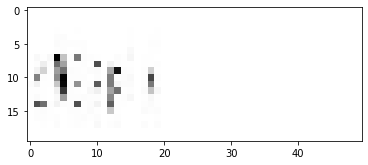

In [11]:
plt.imshow(img_list[0][1], cmap='gray')

Imports the LabelEncoder and OneHotEncoder classes from the sklearn.preprocessing module.

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

creates a new column called Label_Class in the df DataFrame, and sets it to be equal to the existing Label column.

In [13]:
df['Label_Class'] = df['Label']

Creates a new instance of the LabelEncoder class called label_encoder, and applies it to the Label_Class column in the df DataFrame using the fit_transform() method.

In [14]:
label_encoder = LabelEncoder()
df['Label_Class'] = label_encoder.fit_transform(df['Label_Class'])


prints the unique classes in the Label_Class column of the df DataFrame using the classes_ attribute of the LabelEncoder instanceand assigns them to a variable called Label_classes.

In [15]:
print('total classes', label_encoder.classes_)
print('total length of classes', len(label_encoder.classes_))
output_Classes = len(label_encoder.classes_)

total classes ['ALEXANDRE' 'BARRAUD' 'CELESTINE' 'CHANTELOUP' 'CHARLES' 'CHERPiN'
 'DE SA' 'ELIA' 'EMMA' 'GRODZKI' 'HARDY' 'JORIS' 'KEVIN' 'LADU' 'LEO'
 'LEiLi' 'MAHENTHIRAN' 'MILLE' 'PARENT' 'PARIS' 'TASKIN' 'VALENTINE']
total length of classes 22


In [16]:
Label_classes = label_encoder.classes_
print(Label_classes)

['ALEXANDRE' 'BARRAUD' 'CELESTINE' 'CHANTELOUP' 'CHARLES' 'CHERPiN'
 'DE SA' 'ELIA' 'EMMA' 'GRODZKI' 'HARDY' 'JORIS' 'KEVIN' 'LADU' 'LEO'
 'LEiLi' 'MAHENTHIRAN' 'MILLE' 'PARENT' 'PARIS' 'TASKIN' 'VALENTINE']


 saves the Label_classes variable as a binary file using the pickle.dump() method.

In [17]:
import pickle
with open('/content/drive/My Drive/handwritten_word_prediction/label_classes', 'wb') as f:
  pickle.dump(Label_classes, f)

In [18]:
df.head()

,Image,Label,Array,Label_Class
0,1.jpg,CHERPiN,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",5
1,2.jpg,VALENTINE,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",21
2,3.jpg,MAHENTHIRAN,"[[255, 255, 255, 254, 255, 254, 254, 255, 255,...",16
3,4.jpg,GRODZKI,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",9
4,5.jpg,MILLE,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",17


Applies one-hot encoding to the Label_Class column of the df DataFrame using the OneHotEncoder class from scikit-learn.

In [19]:
onehot = OneHotEncoder()
labels = onehot.fit_transform(df.Label_Class.values.reshape(-1,1)).toarray()

In [20]:
print(labels[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


preparing a training set for a machine learning model.

In [21]:
training_set = df['Array']
train_set = []
for img in training_set:
  img = img.reshape(img_size_w, img_size_h, 1)
  train_set.append(img)
train_set = np.array(train_set)

In [22]:
train_set.shape

(22, 50, 20, 1)

In [23]:
train_labels = df.Label_Class.values

Imports several layers and a model class from the TensorFlow Keras API

In [24]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

ThE below code defines a Keras model using the layers and model class that were imported in the previous code snippet.

In [25]:
i = Input(shape=(img_size_w,img_size_h,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(output_Classes, activation='softmax')(x)

creates a Keras model object by calling the Model class with the input layer i and output layer x that were defined earlier. 

In [26]:
model = Model(i,x)


6.Compile the model with the Adam optimizer, categorical_crossentropy as the loss function, and accuracy as the evaluation metric.


In [27]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Train the model on the preprocessed dataset using the fit() method.

In [28]:
r = model.fit(train_set,labels, epochs=500,batch_size=42, validation_split=0.2)

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 5.6786 - accuracy: 0.0000e+00 - val_loss: 7.8727 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 187ms/step - loss: 3.9121 - accuracy: 0.1176 - val_loss: 8.2775 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 170ms/step - loss: 4.7559 - accuracy: 0.0000e+00 - val_loss: 8.8804 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 169ms/step - loss: 3.6967 - accuracy: 0.0588 - val_loss: 9.1119 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 170ms/step - loss: 3.9950 - accuracy: 0.0000e+00 - val_loss: 9.1806 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 176ms/step - loss: 3.4026 - accuracy: 0.1765 - val_loss: 9.1167 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 185ms/step - loss: 3.2628 - accuracy: 0.0588 - val_loss: 9.0393 - v

The model is trained on the preprocessed dataset using the fit() method, and the trained model is saved as a .h5 file. 

In [29]:
model.save('handwrite_model.h5')

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 20, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 20, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 50, 20, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 20, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 10, 32)       0     

In [31]:
img = '/content/drive/My Drive/handwritten_word_prediction/dataset/6.jpg'

This code reads in an image file using the OpenCV imread function and converts it to grayscale using the cv2.IMREAD_GRAYSCALE flag. The grayscale image is then resized to (img_size_w, img_size_h) using the cv2.resize function.



In [32]:
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)
pred = model.predict(array)
y = np.argmax(pred)

1/1 [==============================] - 0s 187ms/step


In [33]:
print(y)
label_encoder.classes_[y]

11


'JORIS'

In [34]:
img = '/content/drive/My Drive/handwritten_word_prediction/dataset/10.jpg'

In [35]:
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)
pred = model.predict(array)
y = np.argmax(pred)

1/1 [==============================] - 0s 26ms/step


In [36]:
print(y)
label_encoder.classes_[y]

12


'KEVIN'

The first line of code prints the predicted class label index, which was obtained using the argmax function on the output of the predict method.

The second line of code uses the classes_ attribute of the LabelEncoder object to map the predicted class label index to the corresponding class label string.

Assuming that label_encoder is a LabelEncoder object that was used to encode the output classes during training, this code will print the predicted class label string for the input image.

In [37]:
img = '/content/drive/My Drive/handwritten_word_prediction/dataset/15.jpg'

In [38]:
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)
pred = model.predict(array)
y = np.argmax(pred)

1/1 [==============================] - 0s 28ms/step


In [39]:
print(y)
label_encoder.classes_[y]

6


'DE SA'

In [40]:
img = '/content/drive/My Drive/handwritten_word_prediction/dataset/17.jpg'

In [41]:
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)
pred = model.predict(array)
y = np.argmax(pred)

1/1 [==============================] - 0s 25ms/step


In [42]:
print(y)
label_encoder.classes_[y]

20


'TASKIN'